# 1 Model

In [5]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

class MinMaxScaler3D(MinMaxScaler):
    """ Feature-wise scaling
        reshape data temporarily to [samples * time-steps , features] for feature-colums
        Code modified from https://stackoverflow.com/a/66650120,
        also https://stackoverflow.com/a/59601298"""
    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

class StandardScaler3D(StandardScaler):
    """ Feature-wise scaling
        reshape data temporarily to [samples * time-steps , features] for feature-colums
        Code modified from https://stackoverflow.com/a/66650120,
        also https://stackoverflow.com/a/59601298"""
    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)


# TODO
# rewrite for train and test set scaling
# for example, using model.fit(train_data)
# and then apply model.scale_ and model.mean_ to test_data.

# hint: actually, this is standard in sklearn
# use this scaler and do a unit test with manually calculated data for train & test set

## Load & scale data

In [25]:
# Load data
data = np.load(Path(r"data/data.npy"))
target = np.load(Path(r"data/target.npy"))


In [4]:
# Scale data
data = StandardScaler3D().fit_transform(data)
# data = MinMaxScaler3D().fit_transform(data)

## 1.1 Baseline model (MLP)

(4000, 1500)

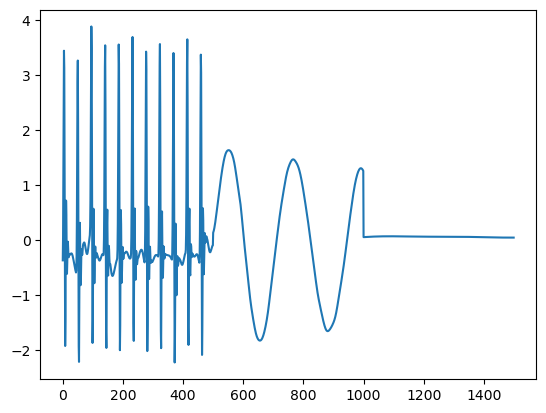

In [39]:
# Reshape data to 1-D for MLP
data_mlp = np.reshape(data, (
    data.shape[0],
    data.shape[2]*data.shape[1]
), order="F")

plt.plot(data_mlp[142]);
data_mlp.shape

## Sklearn implementation


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


model_mlp_sk = MLPClassifier(
    random_state=1, 
    max_iter=500, 
    early_stopping=True)
res = cross_validate(
    model_mlp_sk, 
    data_mlp, 
    target, 
    cv=5, n_jobs=-1,
    return_estimator=True)


# X_train, X_test, y_train, y_test = train_test_split(
#     data_mlp, target, stratify=target, random_state=1)

# clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)

# clf.score(X_test, y_test)


In [41]:
res

{'fit_time': array([18.9974606 , 13.0147059 , 13.81847763, 17.09749508, 17.85365558]),
 'score_time': array([0.01323128, 0.04833865, 0.0565877 , 0.02674317, 0.02013373]),
 'estimator': [MLPClassifier(early_stopping=True, max_iter=500, random_state=1),
  MLPClassifier(early_stopping=True, max_iter=500, random_state=1),
  MLPClassifier(early_stopping=True, max_iter=500, random_state=1),
  MLPClassifier(early_stopping=True, max_iter=500, random_state=1),
  MLPClassifier(early_stopping=True, max_iter=500, random_state=1)],
 'test_score': array([0.8225 , 0.745  , 0.7475 , 0.74375, 0.7925 ])}

## Pytorch implementation

To do list
- add Group (stratified) k-fold cross-validation?